## Python statistics essential training - 04_06_challenge

Standard imports

In [1]:
import math
import io

In [2]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

In [3]:
import scipy.stats
import scipy.optimize
import scipy.spatial

# Challenge

Using bootstrapping on a polling data for Mayor Green's grades, estimate the confidence interval for the fraction of citizens that give her a passing grade: defined as more than five

## Using solution's approach

In [5]:
pop = pd.read_csv('grades.csv')

<AxesSubplot:>

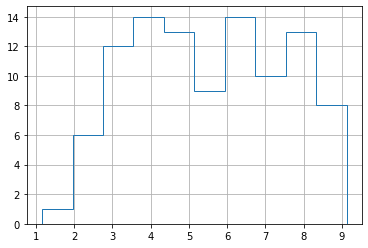

In [39]:
pop.grade.hist(histtype='step')

In [40]:
scipy.stats.percentileofscore(pop.grade, 5)

43.0

In [48]:
bootstrap = pd.DataFrame({'passing': (100 - scipy.stats.percentileofscore(pop.sample(100, replace=True).grade, 5)
                           for i in range(1000))})

<AxesSubplot:>

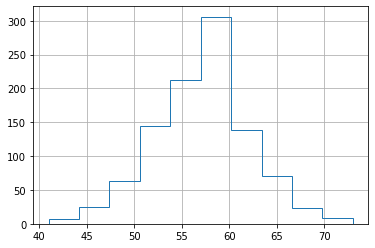

In [49]:
bootstrap.passing.hist(histtype='step')

In [50]:
bootstrap.passing.quantile(0.025), bootstrap.passing.quantile(0.975)

(47.0, 67.0)

## Using approach from CI lesson

In [9]:
sum(pop.grade > 5) / len(pop)

0.57

In [51]:
def sample(approval_rating, n=1000):
    return pd.DataFrame({'rating': np.where(np.random.rand(n) < approval_rating, 'Pass', 'Fail')})

In [52]:
s = sample(0.57, 1000)

In [53]:
s.rating.value_counts(normalize=True)

Pass    0.543
Fail    0.457
Name: rating, dtype: float64

In [54]:
def samplingdist(approval_rating, n=1000):
    return pd.DataFrame((sample(approval_rating, n).rating.value_counts(normalize=True) for i in range(1000)))

In [55]:
def quantiles(approval_rating, n=1000):
    dist = samplingdist(approval_rating, n)
    return dist.Pass.quantile(0.025), dist.Pass.quantile(0.975)

In [56]:
quantiles(0.54)

(0.509, 0.5710249999999999)

In [57]:
quantiles(0.60)

(0.57, 0.630025)

The confidence interval is [0.51, 0.63] at a 95% confidence interval.

# Why did the instructor worked on the "fail" instead of the "passing" grade?

# Is my adaptation of the solution (100 - ...) correct?

# Why are the CI so different? [0.51, 0.63] vs [0.47, 0.67]